[View in Colaboratory](https://colab.research.google.com/github/DongminWu/MLpractice/blob/master/simple_auto_complete.ipynb)

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

import codecs
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(42)

Using TensorFlow backend.


In [0]:
dataX = [
    "中国工商银行",
"中国农业银行",
"中国银行",
"中国建设银行",
"交通银行",
"中国邮政储蓄银行",
"中国光大银行",
"中国民生银行",
"招商银行",
"中信银行",
"华夏银行",
"浦发银行",
"平安银行",
"广发银行",
"兴业银行",
"浙商银行",
"渤海银行",
"恒丰银行",
"企业银行",
"东方汇理银行",
"摩根大通银行",
"友利银行",
"韩亚银行",
"德意志银行",
"新韩银行",
"法国兴业银行",
"蒙特利尔银行",
"瑞士银行",
"国民银行",
"汇丰中国",
"渣打中国",
"花旗中国",
"东亚中国",
"瑞穗中国",
"恒生中国",
"星展中国",
"三菱日联中国",
"南商中国",
"大华中国",
"法国巴黎银行",
"三井中国",
"汇理中国",
"盘谷中国",
"澳新中国",
"富邦华一银行",
"华美中国",
"正信银行",
"浦发硅谷银行",
"首都银行",
"摩根士丹利国际银行",
"新联商业银行",
"华商银行",
"华侨永亨银行",
"大新银行",
"中信银行国际",    
]

dataY = np.arange(len(dataX))




In [3]:
#word embedding

all_words = []
all_samples = []
max_len = 0

for item in dataX:
  list_item = list(item)
  all_samples.append(list_item)
  max_len = len(list_item) if max_len < len(list_item) else max_len
  for e in list_item:
    all_words.append(e)

all_words = np.array(all_words)
uni_words = np.unique(all_words)

print('words:', uni_words)
print('max length:', max_len)

words: ['一' '三' '业' '东' '中' '丰' '丹' '井' '亚' '交' '亨' '企' '侨' '信' '储' '光' '兴' '农'
 '利' '华' '南' '友' '发' '商' '国' '士' '夏' '大' '安' '富' '尔' '展' '工' '巴' '平' '广'
 '建' '德' '志' '恒' '意' '打' '招' '摩' '政' '新' '方' '旗' '日' '星' '根' '正' '民' '永'
 '汇' '法' '浙' '浦' '海' '渣' '渤' '澳' '特' '理' '瑞' '生' '盘' '硅' '穗' '美' '联' '花'
 '菱' '蒙' '蓄' '行' '设' '谷' '通' '邦' '邮' '都' '银' '际' '韩' '首' '黎']
max length: 9


In [4]:
# building word dictionary

one_hot = np.eye(uni_words.shape[0])
word_dict = {}
for i, e in enumerate(uni_words):
  word_dict[e] = i
word_dict

{'一': 0,
 '三': 1,
 '业': 2,
 '东': 3,
 '中': 4,
 '丰': 5,
 '丹': 6,
 '井': 7,
 '亚': 8,
 '交': 9,
 '亨': 10,
 '企': 11,
 '侨': 12,
 '信': 13,
 '储': 14,
 '光': 15,
 '兴': 16,
 '农': 17,
 '利': 18,
 '华': 19,
 '南': 20,
 '友': 21,
 '发': 22,
 '商': 23,
 '国': 24,
 '士': 25,
 '夏': 26,
 '大': 27,
 '安': 28,
 '富': 29,
 '尔': 30,
 '展': 31,
 '工': 32,
 '巴': 33,
 '平': 34,
 '广': 35,
 '建': 36,
 '德': 37,
 '志': 38,
 '恒': 39,
 '意': 40,
 '打': 41,
 '招': 42,
 '摩': 43,
 '政': 44,
 '新': 45,
 '方': 46,
 '旗': 47,
 '日': 48,
 '星': 49,
 '根': 50,
 '正': 51,
 '民': 52,
 '永': 53,
 '汇': 54,
 '法': 55,
 '浙': 56,
 '浦': 57,
 '海': 58,
 '渣': 59,
 '渤': 60,
 '澳': 61,
 '特': 62,
 '理': 63,
 '瑞': 64,
 '生': 65,
 '盘': 66,
 '硅': 67,
 '穗': 68,
 '美': 69,
 '联': 70,
 '花': 71,
 '菱': 72,
 '蒙': 73,
 '蓄': 74,
 '行': 75,
 '设': 76,
 '谷': 77,
 '通': 78,
 '邦': 79,
 '邮': 80,
 '都': 81,
 '银': 82,
 '际': 83,
 '韩': 84,
 '首': 85,
 '黎': 86}

In [5]:
# translating with dictionary
all_samples

[['中', '国', '工', '商', '银', '行'],
 ['中', '国', '农', '业', '银', '行'],
 ['中', '国', '银', '行'],
 ['中', '国', '建', '设', '银', '行'],
 ['交', '通', '银', '行'],
 ['中', '国', '邮', '政', '储', '蓄', '银', '行'],
 ['中', '国', '光', '大', '银', '行'],
 ['中', '国', '民', '生', '银', '行'],
 ['招', '商', '银', '行'],
 ['中', '信', '银', '行'],
 ['华', '夏', '银', '行'],
 ['浦', '发', '银', '行'],
 ['平', '安', '银', '行'],
 ['广', '发', '银', '行'],
 ['兴', '业', '银', '行'],
 ['浙', '商', '银', '行'],
 ['渤', '海', '银', '行'],
 ['恒', '丰', '银', '行'],
 ['企', '业', '银', '行'],
 ['东', '方', '汇', '理', '银', '行'],
 ['摩', '根', '大', '通', '银', '行'],
 ['友', '利', '银', '行'],
 ['韩', '亚', '银', '行'],
 ['德', '意', '志', '银', '行'],
 ['新', '韩', '银', '行'],
 ['法', '国', '兴', '业', '银', '行'],
 ['蒙', '特', '利', '尔', '银', '行'],
 ['瑞', '士', '银', '行'],
 ['国', '民', '银', '行'],
 ['汇', '丰', '中', '国'],
 ['渣', '打', '中', '国'],
 ['花', '旗', '中', '国'],
 ['东', '亚', '中', '国'],
 ['瑞', '穗', '中', '国'],
 ['恒', '生', '中', '国'],
 ['星', '展', '中', '国'],
 ['三', '菱', '日', '联', '中', '国'],
 ['南', '商', '中', '国'],
 

In [6]:
samples = []
for item in all_samples:
  one_line = []
  for e in item:
    one_line.append(word_dict[e])
  samples.append(np.array(one_line))
  
      
samples

[array([ 4, 24, 32, 23, 82, 75]),
 array([ 4, 24, 17,  2, 82, 75]),
 array([ 4, 24, 82, 75]),
 array([ 4, 24, 36, 76, 82, 75]),
 array([ 9, 78, 82, 75]),
 array([ 4, 24, 80, 44, 14, 74, 82, 75]),
 array([ 4, 24, 15, 27, 82, 75]),
 array([ 4, 24, 52, 65, 82, 75]),
 array([42, 23, 82, 75]),
 array([ 4, 13, 82, 75]),
 array([19, 26, 82, 75]),
 array([57, 22, 82, 75]),
 array([34, 28, 82, 75]),
 array([35, 22, 82, 75]),
 array([16,  2, 82, 75]),
 array([56, 23, 82, 75]),
 array([60, 58, 82, 75]),
 array([39,  5, 82, 75]),
 array([11,  2, 82, 75]),
 array([ 3, 46, 54, 63, 82, 75]),
 array([43, 50, 27, 78, 82, 75]),
 array([21, 18, 82, 75]),
 array([84,  8, 82, 75]),
 array([37, 40, 38, 82, 75]),
 array([45, 84, 82, 75]),
 array([55, 24, 16,  2, 82, 75]),
 array([73, 62, 18, 30, 82, 75]),
 array([64, 25, 82, 75]),
 array([24, 52, 82, 75]),
 array([54,  5,  4, 24]),
 array([59, 41,  4, 24]),
 array([71, 47,  4, 24]),
 array([ 3,  8,  4, 24]),
 array([64, 68,  4, 24]),
 array([39, 65,  4, 24])

In [7]:
embedded_words = np.zeros([len(dataX), max_len, len(uni_words)])
for i, item in enumerate(all_samples):
  for j, character in enumerate(item):
    embedded_words[i, j, word_dict[character]] = 1
embedded_words.shape


(55, 9, 87)

In [8]:
trainX = embedded_words

trainY = np.eye(len(dataY))

trainY

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [0]:
model = Sequential()
model.add(LSTM(128, input_shape=(None, len(uni_words))))
model.add(Dense(len(dataY), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               110592    
_________________________________________________________________
dense_2 (Dense)              (None, 55)                7095      
Total params: 117,687
Trainable params: 117,687
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(trainX, trainY,epochs=1000, verbose=0)

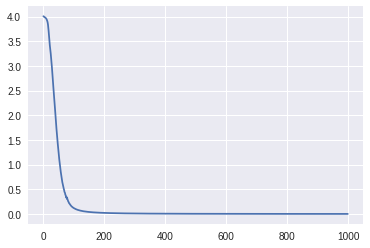

In [34]:
plt.plot(history.history['loss'])

In [35]:
model.predict(trainX[1,2:5,:][None,:,:])

array([[0.02250632, 0.1238834 , 0.02991117, 0.0159729 , 0.00358951,
        0.03754916, 0.01721789, 0.02464882, 0.00486366, 0.01910178,
        0.01295016, 0.01104061, 0.00301006, 0.01164808, 0.02669056,
        0.01735429, 0.00113029, 0.0051331 , 0.03398844, 0.00444126,
        0.01889255, 0.00233036, 0.00367913, 0.00472446, 0.00594442,
        0.06234615, 0.03768202, 0.01426221, 0.02664657, 0.00665612,
        0.00975595, 0.00135013, 0.00155233, 0.00247792, 0.00401465,
        0.01644549, 0.03072201, 0.00938556, 0.00493847, 0.01895215,
        0.00195402, 0.00258318, 0.00251264, 0.00648397, 0.04854213,
        0.00528277, 0.01174087, 0.04327172, 0.01162121, 0.01956949,
        0.06031187, 0.02184224, 0.01834461, 0.00447386, 0.03207529]],
      dtype=float32)

In [0]:
def test_part_pred(test):
  test_l = list(test)
  translated = np.zeros([1, len(test_l), len(uni_words)])
  for i,e  in enumerate(test_l):
    translated[0, i, word_dict[e]] = 1
  res = model.predict(translated).flatten()
  res_idx = np.argsort(res)
  for i in range(1,5):
    print(i, dataX[res_idx[-i]], 'confidence:',res[res_idx[-i]])
  

In [0]:
def test_padding_pred(test):
  test_l = list(test)
  translated = np.zeros([1, max_len, len(uni_words)])
  for i,e  in enumerate(test_l):
    translated[0, i, word_dict[e]] = 1
  res = model.predict(translated).flatten()
  res_idx = np.argsort(res)
  for i in range(1,5):
    print(i, dataX[res_idx[-i]], 'confidence:',res[res_idx[-i]])

In [85]:
test_part_pred('浦发银行') # error

1 浦发硅谷银行 confidence: 0.34641626
2 企业银行 confidence: 0.0632657
3 国民银行 confidence: 0.0625204
4 浦发银行 confidence: 0.061425637


In [91]:
test_padding_pred('浦发银行') # correct

1 浦发银行 confidence: 0.99854445
2 招商银行 confidence: 0.00040687196
3 广发银行 confidence: 0.00030458716
4 浦发硅谷银行 confidence: 0.00026464887


In [86]:
test_part_pred('中国银行')

1 中国银行 confidence: 0.13142104
2 中国民生银行 confidence: 0.12011822
3 中国光大银行 confidence: 0.070132375
4 中信银行国际 confidence: 0.06660226


In [87]:
test_part_pred('邮储银行')

1 中国邮政储蓄银行 confidence: 0.08233403
2 浦发硅谷银行 confidence: 0.07148282
3 新联商业银行 confidence: 0.070438586
4 中国农业银行 confidence: 0.065429546


In [88]:
test_part_pred('农行') # correct

1 中国农业银行 confidence: 0.040631782
2 中国邮政储蓄银行 confidence: 0.03114775
3 浦发硅谷银行 confidence: 0.028055657
4 蒙特利尔银行 confidence: 0.028047225


In [100]:
test_padding_pred('农行') # error

1 企业银行 confidence: 0.7193636
2 兴业银行 confidence: 0.25799912
3 浦发硅谷银行 confidence: 0.009122236
4 浦发银行 confidence: 0.0036153852


In [81]:
test_part_pred('硅谷蒙特利尔')

1 蒙特利尔银行 confidence: 0.93809736
2 法国巴黎银行 confidence: 0.02374089
3 国民银行 confidence: 0.018213242
4 浦发硅谷银行 confidence: 0.006558628


In [107]:
test_part_pred('蒙尔')

1 蒙特利尔银行 confidence: 0.037981875
2 中国邮政储蓄银行 confidence: 0.027013741
3 中信银行国际 confidence: 0.02674882
4 中国农业银行 confidence: 0.026427884


In [108]:
test_part_pred('中农行')

1 中国农业银行 confidence: 0.056748103
2 中国邮政储蓄银行 confidence: 0.049578756
3 中国民生银行 confidence: 0.04324816
4 中国银行 confidence: 0.036165647


In [83]:
preds = model.predict(trainX)
idx = preds.argmax(axis=0)
for i,index in enumerate(idx):
  print(dataX[index],'-',preds[i,index])

中国工商银行 - 0.998965
中国农业银行 - 0.9989942
中国银行 - 0.9985702
中国建设银行 - 0.999243
交通银行 - 0.99921334
中国邮政储蓄银行 - 0.9991466
中国光大银行 - 0.9988135
中国民生银行 - 0.9986314
招商银行 - 0.9984308
中信银行 - 0.99858826
华夏银行 - 0.9989926
浦发银行 - 0.99854445
平安银行 - 0.9988078
广发银行 - 0.99855036
兴业银行 - 0.9983885
浙商银行 - 0.99893135
渤海银行 - 0.9994349
恒丰银行 - 0.9993913
企业银行 - 0.9983057
东方汇理银行 - 0.99943465
摩根大通银行 - 0.99939847
友利银行 - 0.99911946
韩亚银行 - 0.99887687
德意志银行 - 0.99926084
新韩银行 - 0.99913895
法国兴业银行 - 0.9992803
蒙特利尔银行 - 0.9994573
瑞士银行 - 0.9993179
国民银行 - 0.9988532
汇丰中国 - 0.99865353
渣打中国 - 0.9990398
花旗中国 - 0.99881554
东亚中国 - 0.9992939
瑞穗中国 - 0.99861765
恒生中国 - 0.999343
星展中国 - 0.99889165
三菱日联中国 - 0.99926406
南商中国 - 0.99899894
大华中国 - 0.99914455
法国巴黎银行 - 0.99941766
三井中国 - 0.9986915
汇理中国 - 0.99866414
盘谷中国 - 0.99890924
澳新中国 - 0.99892277
富邦华一银行 - 0.99883777
华美中国 - 0.99899083
正信银行 - 0.99941933
浦发硅谷银行 - 0.9989562
首都银行 - 0.999203
摩根士丹利国际银行 - 0.9993017
新联商业银行 - 0.99911445
华商银行 - 0.9988446
华侨永亨银行 - 0.99951637
大新银行 - 0.9993723
中信银行国际 - 0.9981875
